In [182]:
using Revise
push!(LOAD_PATH, "../src") 
using DataFrames
using CovidDepressionAnalysis
using CSV
using Counterfactuals
using Plots

In [184]:
w6 = CSV.read("../output/IP_weighted_sources/w6.csv", DataFrame)

,PROLIFIC_PID,Gender_w1,Education_w1,Income_w1,Political_Views_w1,Age_w1,Race_w1,Depression_w1,Stress_w1,Anxiety_w1,Fear_COVID_w1,Emotional_Support_w1,Loneliness_w1,slope_new_cases_w1
,String31,Bool,Float64,Float64,Float64,Float64,Float64,Missing,Missing,Int64,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,0,5.0,3.0,1.0,55.0,5.0,missing,missing,69,24.0,30.0,10.0,82.2857
2,5e67052c757e6149c38ce468,1,1.0,1.0,4.0,23.0,7.0,missing,missing,57,18.0,14.0,25.0,82.2857
3,5d89106d1719af0001ee23e5,0,2.0,1.0,6.0,47.0,5.0,missing,missing,27,8.0,40.0,5.0,82.2857
4,5d6394518df2870001a74b42,0,2.0,1.0,1.0,23.0,5.0,missing,missing,42,23.0,40.0,16.0,82.2857
5,5bdd368719b9ba000157fb12,0,3.0,4.0,4.0,28.0,5.0,missing,missing,29,10.0,40.0,5.0,82.2857
6,5a8ce265000dab00018ce084,0,4.0,6.0,3.0,50.0,5.0,missing,missing,37,6.0,34.0,7.0,82.2857
7,5c72efa770d5a200018028f1,1,5.0,2.0,3.0,71.0,5.0,missing,missing,27,9.0,39.0,5.0,82.2857
8,5aea962d0ef2f20001858c9c,1,2.0,1.0,2.0,36.0,5.0,missing,missing,59,17.0,17.0,16.0,82.2857
9,5e4b793f03c92a08a6d28e3f,1,2.0,7.0,4.0,21.0,2.0,missing,missing,42,4.0,18.0,11.0,82.2857


In [166]:
w1 = CSV.read("../output/v2/w1.csv", DataFrame)
w6 = CSV.read("../output/v2/w6.csv", DataFrame)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Age,Race,Depression,Stress,Anxiety,Fear_COVID,Emotional_Support,Loneliness,slope_new_cases,slope_new_deaths,GatheringStrictness
,String31,Bool,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,0,5.0,1.0,1.0,55.0,5.0,16,29,40,21.0,40.0,8.0,13.7143,2.28571,1.0
2,5e67052c757e6149c38ce468,1,1.0,1.0,4.0,23.0,7.0,51,22,71,14.0,9.0,25.0,13.7143,2.28571,1.0
3,5d89106d1719af0001ee23e5,0,2.0,1.0,6.0,47.0,5.0,0,6,29,0.0,40.0,5.0,13.7143,2.28571,1.0
4,5d6394518df2870001a74b42,0,2.0,1.0,1.0,23.0,5.0,53,35,48,17.0,40.0,13.0,13.7143,2.28571,1.0
5,5bdd368719b9ba000157fb12,0,3.0,1.0,4.0,28.0,5.0,8,3,33,12.0,40.0,5.0,13.7143,2.28571,1.0
6,5a8ce265000dab00018ce084,0,4.0,6.0,3.0,50.0,5.0,11,16,25,1.0,35.0,12.0,13.7143,2.28571,1.0
7,5c72efa770d5a200018028f1,1,5.0,2.0,3.0,71.0,5.0,1,3,25,13.0,39.0,5.0,13.7143,2.28571,1.0
8,5aea962d0ef2f20001858c9c,1,2.0,1.0,2.0,36.0,5.0,28,32,58,11.0,19.0,14.0,13.7143,2.28571,1.0
9,5e4b793f03c92a08a6d28e3f,1,2.0,1.0,4.0,21.0,2.0,22,20,49,5.0,16.0,15.0,13.7143,2.28571,1.0


In [167]:
adjustments = ["Income", "Gender", "Age", "Education", "Race_AA", "Race_W"]
square_terms = ["Income", "Age", "Education"]
treatment = "low_quality"
target = "Depression"

"Depression"

In [168]:
w6[:, :low_quality] = sum.(eachrow(w6[!, QUALITY_OUTPUT_NAME])) .>= 1

1178-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [169]:
w6[!, :low_quality]

1178-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [170]:
fit = cal_ipw(w6, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

low_quality ~ 1 + Income + Gender + Age + Education + Race_AA + Race_W + Income^2 + Age^2 + Education^2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.    Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.65234       1.34173      -1.98    0.0481   -5.28207     -0.0225998
Income       -0.199988      0.286802     -0.70    0.4856   -0.762109     0.362133
Gender       -0.0875126     0.240528     -0.36    0.7160   -0.558938     0.383913
Age           0.042778      0.0717598     0.60    0.5511   -0.0978686    0.183425
Education     0.0394582     0.361571      0.11    0.9131   -0.66

In [171]:
w6[!, :low_quality]

1178-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [172]:
w1_w6_combined = combine_wave_data(w1, w6, "PROLIFIC_PID", "w1", "w6")

,PROLIFIC_PID,Gender_w1,Education_w1,Income_w1,Political_Views_w1,Age_w1,Race_w1,Depression_w1,Stress_w1,Anxiety_w1,Fear_COVID_w1,Emotional_Support_w1,Loneliness_w1,slope_new_cases_w1
,String31,Bool?,Float64?,Float64?,Float64?,Float64?,Float64?,Missing,Missing,Int64?,Float64?,Float64?,Float64?,Float64?
1,5c7e91c1973c990016ea72b0,0,5.0,3.0,1.0,55.0,5.0,missing,missing,69,24.0,30.0,10.0,82.2857
2,5e67052c757e6149c38ce468,1,1.0,1.0,4.0,23.0,7.0,missing,missing,57,18.0,14.0,25.0,82.2857
3,5d89106d1719af0001ee23e5,0,2.0,1.0,6.0,47.0,5.0,missing,missing,27,8.0,40.0,5.0,82.2857
4,5d6394518df2870001a74b42,0,2.0,1.0,1.0,23.0,5.0,missing,missing,42,23.0,40.0,16.0,82.2857
5,5bdd368719b9ba000157fb12,0,3.0,4.0,4.0,28.0,5.0,missing,missing,29,10.0,40.0,5.0,82.2857
6,5a8ce265000dab00018ce084,0,4.0,6.0,3.0,50.0,5.0,missing,missing,37,6.0,34.0,7.0,82.2857
7,5c72efa770d5a200018028f1,1,5.0,2.0,3.0,71.0,5.0,missing,missing,27,9.0,39.0,5.0,82.2857
8,5aea962d0ef2f20001858c9c,1,2.0,1.0,2.0,36.0,5.0,missing,missing,59,17.0,17.0,16.0,82.2857
9,5e4b793f03c92a08a6d28e3f,1,2.0,7.0,4.0,21.0,2.0,missing,missing,42,4.0,18.0,11.0,82.2857


In [173]:
w1_w6_combined[!,:low_quality_w6]

1797-element Vector{Union{Missing, Bool}}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
      missing
      missing
      missing
      missing
      missing
      missing
      missing
      missing
      missing

In [176]:
w1_w6_combined[!, :dropout] = w1_w6_combined[!, "Depression_w6"].===missing

1797-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [177]:
adjustments = ["Income_w1", "Gender_w1", "Age_w1", "Education_w1", "Race_AA_w1", "Race_W_w1"]
square_terms = ["Income_w1", "Age_w1", "Education_w1"]
treatment = "dropout"
target = "Depression"

"Depression"

In [178]:
fit = cal_ipw(w1_w6_combined, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

dropout ~ 1 + Income_w1 + Gender_w1 + Age_w1 + Education_w1 + Race_AA_w1 + Race_W_w1 + Income_w1^2 + Age_w1^2 + Education_w1^2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.364975    0.29204       1.25    0.2114  -0.207413     0.937363
Income_w1        0.0855109   0.0783456     1.09    0.2751  -0.0680437    0.239065
Gender_w1       -0.0105184   0.0624086    -0.17    0.8662  -0.132837     0.1118
Age_w1          -0.0194272   0.0142339    -1.36    0.1723  -0.0473251    0.00847077
Education_w1    -0.0854097   0.0835617 

In [179]:
w1_w6_combined[!, :total_w] = w1_w6_combined[!, :low_quality_w_w6] .* w1_w6_combined[!, :dropout_w]

1797-element Vector{Union{Missing, Float64}}:
 0.7448289595782437
 0.5254083769860263
 0.6919217857837503
 0.5378375413599564
 0.5821569008525971
 0.7625834075157938
 0.819182198225355
 0.6292042567899955
 0.6392747674979793
 0.6391023954042704
 ⋮
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing

In [180]:
w1_w6_combined[!, :Depression_adj] = w1_w6_combined[!, :Depression_w6] .* (1 ./ w1_w6_combined[!, :total_w])

1797-element Vector{Union{Missing, Float64}}:
 21.481441872319163
 97.0673522423804
  0.0
 98.54276788858236
 13.741999774087727
 14.424651640184264
  1.2207296522878082
 44.50065252712576
 34.41399710816764
 20.34102843845034
  ⋮
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing

In [186]:
open("file.txt","a") do io
    println(io,"a=",a)
 end
println(fit)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{

Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

dropout ~ 1 + Income_w1 + Gender_w1 + Age_w1 + Education_w1 + Race_AA_w1 + Race_W_w1 + Income_w1^2 + Age_w1^2 + Education_w1^2

Coefficients:


────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.364975    0.29204       1.25    0.2114  -0.207413     0.937363
Income_w1        0.0855109   0.0783456     1.09    0.2751  -0.0680437    0.239065
Gender_w1       -0.0105184   0.0624086    -0.17    0.8662  -0.132837     0.1118
Age_w1          -0.0194272   0.0142339    -1.36    0.1723  -0.0473251    0.00847077
Education_w1    -0.0854097   0.0835617    -1.02    0.3067  -0.249188     0.0783682
Race_AA_w1      -0.117006    0.133005     -0.88    0.3790  -0.377691     0.143678
Race_W_w1        0.00240504  0.0814446     0.03    0.9764  -0.157223     0.162034
Income_w1^2     -0.0164083   0.0114175    -1.44    0.1507  -0.0387862    0.00596959
Age_w1^2         3.89681e-5  0.000168463   0.23    0.8171  -0.000291213  0.000369149
E

In [181]:
selected = w1_w6_combined[(w1_w6_combined[!, :Depression_adj] .!==missing) .& (w1_w6_combined[!, :low_quality_w6] .== 0), :Depression_adj]

1167-element Vector{Union{Missing, Float64}}:
 21.481441872319163
 97.0673522423804
  0.0
 98.54276788858236
 13.741999774087727
 14.424651640184264
  1.2207296522878082
 44.50065252712576
 34.41399710816764
 20.34102843845034
  ⋮
 18.295018083884422
 16.68341326045705
 24.298641223434846
  6.8031010252342305
  6.275636828853041
 36.78178396396201
 33.294135933486565
  6.996680477968803
  0.0

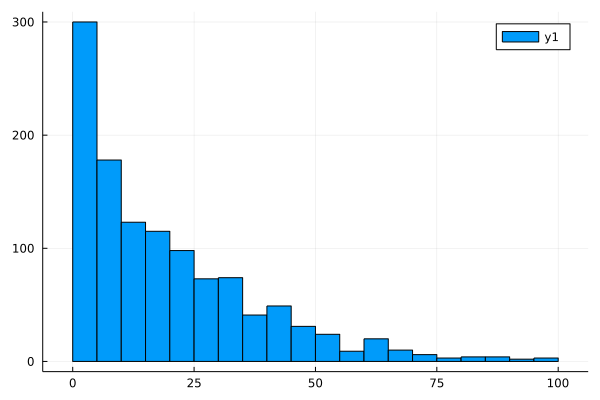

In [183]:
histogram(selected)

In [4]:
# Process Meta data
# Set view columns
ENV["COLUMNS"] = 200
# Variables selected
selected_variables = [DEMOGRAPHICS; PSYCHOLOGICAL; EXTERNAL; QUALITY; EXTRAS]

21-element Vector{String}:
 "PROLIFIC_PID"
 "Sex"
 "Education"
 "Income_HH"
 "DemM7_KNN"
 "BDI_total_raw"
 "PSS_Total"
 "STAI_State_raw"
 "Fear_COVID_raw_KNN"
 "NIH_TB_Emot_Support_raw_total_KNN"
 ⋮
 "slope_new_deaths"
 "GatheringStrictness_KNN"
 "Mandatory_business_closure"
 "Mandatory_PPE_masks"
 "more_than_1_attQ_failed"
 "string_outlier_core"
 "response_consistency"
 "wave"
 "RW1_8"

In [6]:
w1 = rename!(extract_wave(data, 1, selected_variables), VARNAME_MAPPING)
w6 = rename!(extract_wave(data, 6, selected_variables), VARNAME_MAPPING)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Depression,Stress,Anxiety,Fear_COVID,Emotional_Support,Loneliness,slope_new_cases,slope_new_deaths,GatheringStrictness
,String31,Float64,Float64,Float64,Float64,Int64?,Int64?,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,2.0,5.0,1.0,1.0,16,29,40,21.0,40.0,8.0,13.7143,2.28571,1.0
2,5e67052c757e6149c38ce468,1.0,1.0,1.0,4.0,51,22,71,14.0,9.0,25.0,13.7143,2.28571,1.0
3,5d89106d1719af0001ee23e5,2.0,2.0,1.0,6.0,0,6,29,0.0,40.0,5.0,13.7143,2.28571,1.0
4,5d6394518df2870001a74b42,2.0,2.0,1.0,1.0,53,35,48,17.0,40.0,13.0,13.7143,2.28571,1.0
5,5bdd368719b9ba000157fb12,2.0,3.0,1.0,4.0,8,3,33,12.0,40.0,5.0,13.7143,2.28571,1.0
6,5a8ce265000dab00018ce084,2.0,4.0,6.0,3.0,11,16,25,1.0,35.0,12.0,13.7143,2.28571,1.0
7,5c72efa770d5a200018028f1,1.0,5.0,2.0,3.0,1,3,25,13.0,39.0,5.0,13.7143,2.28571,1.0
8,5aea962d0ef2f20001858c9c,1.0,2.0,1.0,2.0,28,32,58,11.0,19.0,14.0,13.7143,2.28571,1.0
9,5e4b793f03c92a08a6d28e3f,1.0,2.0,1.0,4.0,22,20,49,5.0,16.0,15.0,13.7143,2.28571,1.0


In [8]:
w1_w6_combine_data = combine_wave_data(w1, w6, "PROLIFIC_PID", "w1", "w6")

,PROLIFIC_PID,Gender_w1,Education_w1,Income_w1,Political_Views_w1,Depression_w1,Stress_w1,Anxiety_w1,Fear_COVID_w1,Emotional_Support_w1,Loneliness_w1,slope_new_cases_w1,slope_new_deaths_w1
,String31,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,5c7e91c1973c990016ea72b0,2.0,5.0,3.0,1.0,missing,missing,69,24.0,30.0,10.0,82.2857,3.28571
2,5e67052c757e6149c38ce468,1.0,1.0,1.0,4.0,missing,missing,57,18.0,14.0,25.0,82.2857,3.28571
3,5d89106d1719af0001ee23e5,2.0,2.0,1.0,6.0,missing,missing,27,8.0,40.0,5.0,82.2857,3.28571
4,5d6394518df2870001a74b42,2.0,2.0,1.0,1.0,missing,missing,42,23.0,40.0,16.0,82.2857,3.28571
5,5bdd368719b9ba000157fb12,2.0,3.0,4.0,4.0,missing,missing,29,10.0,40.0,5.0,82.2857,3.28571
6,5a8ce265000dab00018ce084,2.0,4.0,6.0,3.0,missing,missing,37,6.0,34.0,7.0,82.2857,3.28571
7,5c72efa770d5a200018028f1,1.0,5.0,2.0,3.0,missing,missing,27,9.0,39.0,5.0,82.2857,3.28571
8,5aea962d0ef2f20001858c9c,1.0,2.0,1.0,2.0,missing,missing,59,17.0,17.0,16.0,82.2857,3.28571
9,5e4b793f03c92a08a6d28e3f,1.0,2.0,7.0,4.0,missing,missing,42,4.0,18.0,11.0,82.2857,3.28571


In [21]:
data[!, :wave]==1b

false

In [45]:
interpolate_age(data)

In [50]:
data[data[!, :PROLIFIC_PID].==unique_pid[3],:prlfc_dem_age]

9-element Vector{Union{Missing, Float64}}:
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0

In [23]:
unique_pid = unique(data[data[!, :wave].==1, :PROLIFIC_PID])

1797-element Vector{String31}:
 "5df82e8739bcde5dd044f741"
 "5c7e91c1973c990016ea72b0"
 "5e67052c757e6149c38ce468"
 "5d89106d1719af0001ee23e5"
 "5d6394518df2870001a74b42"
 "5bdd368719b9ba000157fb12"
 "5b68d45687af3100015849a9"
 "5a8ce265000dab00018ce084"
 "5c72efa770d5a200018028f1"
 "5d378df21acda30001e7191e"
 ⋮
 "5da926115c6987001535a2da"
 "5c054e8a553fb800011917d7"
 "5cad4750f4115800176d506e"
 "5be8846293ca1f00014db03c"
 "5dbd1569f8223b28d73ed6ae"
 "5e217a34e8ff3a469b5dfebc"
 "5d63867550d0dd0017805976"
 "5e6155e6f169c0046b6d6518"
 "58cefdb030c4cf0001ceb3ac"

In [29]:
unique_pid[1]

"5df82e8739bcde5dd044f741"

In [35]:
w1 = data[data[!, :wave].==1, :]

data[!, :PROLIFIC_PID].==unique_pid[1]

18493-element BitVector:
 1
 1
 1
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [38]:
data[data[!, :PROLIFIC_PID].==unique_pid[1],"prlfc_dem_age"] .= w1[w1[!, :PROLIFIC_PID].==unique_pid[1], :prlfc_dem_age]

3-element view(::SentinelArrays.SentinelVector{Float64, Float64, Missing, Vector{Float64}}, [1, 2, 3]) with eltype Union{Missing, Float64}:
 32.0
 32.0
 32.0

In [39]:
data[data[!, :PROLIFIC_PID].==unique_pid[1],"prlfc_dem_age"]

3-element Vector{Union{Missing, Float64}}:
 32.0
 32.0
 32.0

In [ ]:
for id in unique_pid
    data[data[!, :PROLIFIC_PID].==id, :prlfc_dem_age] = 
end

In [19]:
w6[!, "wave"]

1797-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1